# 🎬 Analyse Exploratoire des Contenus Netflix

> 📊 Projet Data Science – Analyse d'un dataset de films et séries proposés par Netflix

---

## 🔹 1. Introduction

Dans ce projet, nous analysons les contenus disponibles sur Netflix : types, genres, durées, pays, etc.  
L'objectif est de dégager des tendances générales à partir d’un fichier `.csv` contenant les titres Netflix.

---

## 🔹 2. Chargement des données

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10, 6)

df = pd.read_csv("data/netflix_titles.csv")
df.head()


In [3]:
# Étape 1 : Importer les bibliothèques
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration graphique
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Étape 2 : Charger les données
df = pd.read_csv('C:/Users/jason_dalbergia/Desktop/Projet_potfolio_2025_04_19/2025_04_19_0001/netflix_titles.csv')  # change le chemin si besoin

# Aperçu des données
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [5]:
# Taille du dataset
print(f"Nombre de lignes : {df.shape[0]}, colonnes : {df.shape[1]}")

Nombre de lignes : 6234, colonnes : 12


In [6]:
# Résumé des colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [7]:
# Vérification des valeurs manquantes
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

### Répartition entre Films et Séries (type)

In [9]:
# Compter le nombre de Films vs Séries
df['type'].value_counts()

type
Movie      4265
TV Show    1969
Name: count, dtype: int64

C:\Users\jason_dalbergia\AppData\Local\Temp\ipykernel_7472\2333295110.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


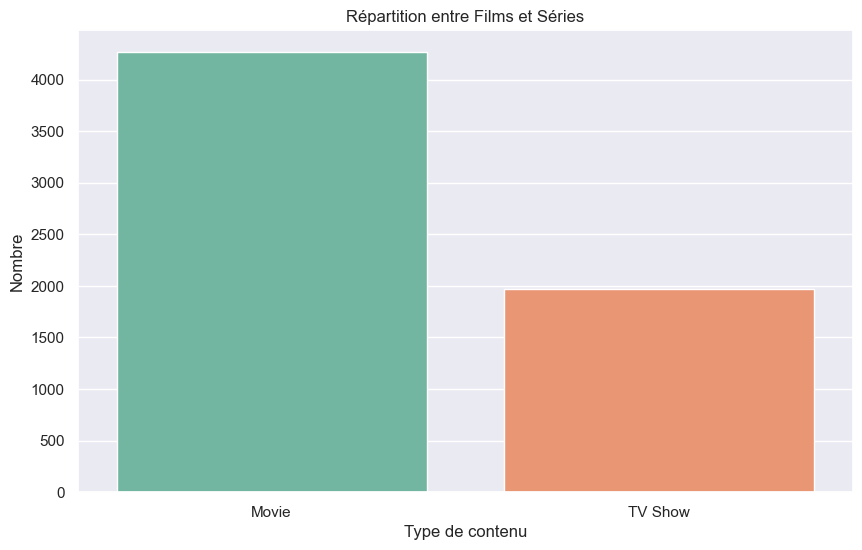

In [10]:
# Visualisation
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Répartition entre Films et Séries")
plt.xlabel("Type de contenu")
plt.ylabel("Nombre")
plt.show()

### Répartition par année de sortie

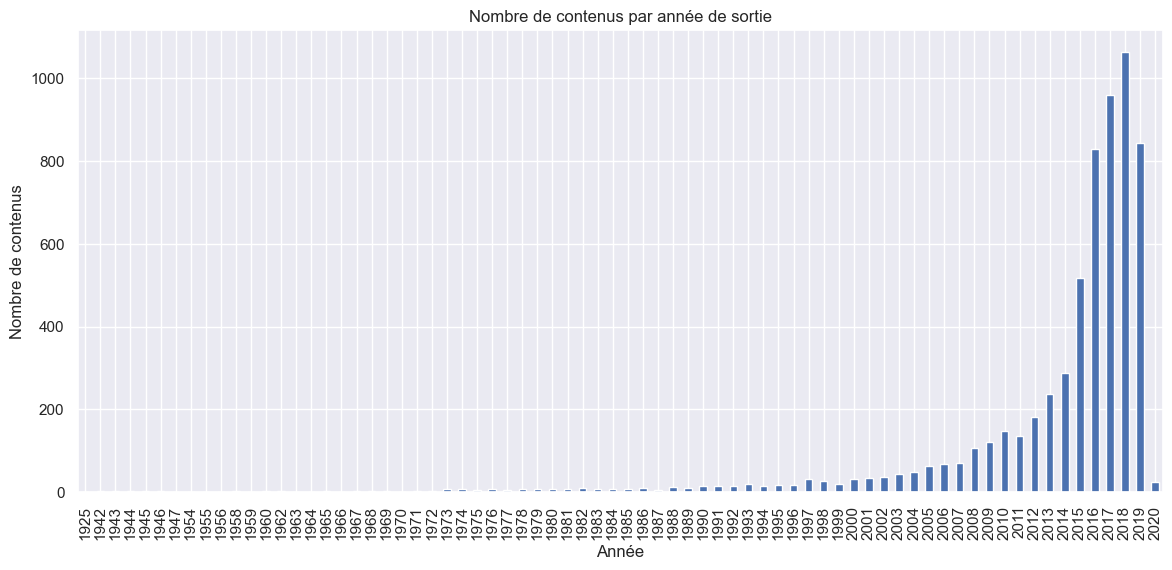

In [11]:
# Supprimer les valeurs manquantes dans 'release_year'
df = df.dropna(subset=['release_year'])

# Compter les sorties par année
df['release_year'] = df['release_year'].astype(int)
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(14,6))
plt.title("Nombre de contenus par année de sortie")
plt.xlabel("Année")
plt.ylabel("Nombre de contenus")
plt.show()


### Top 10 des pays les plus représentés

C:\Users\jason_dalbergia\AppData\Local\Temp\ipykernel_7472\2369674264.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_pays.index, x=top_pays.values, palette="viridis")


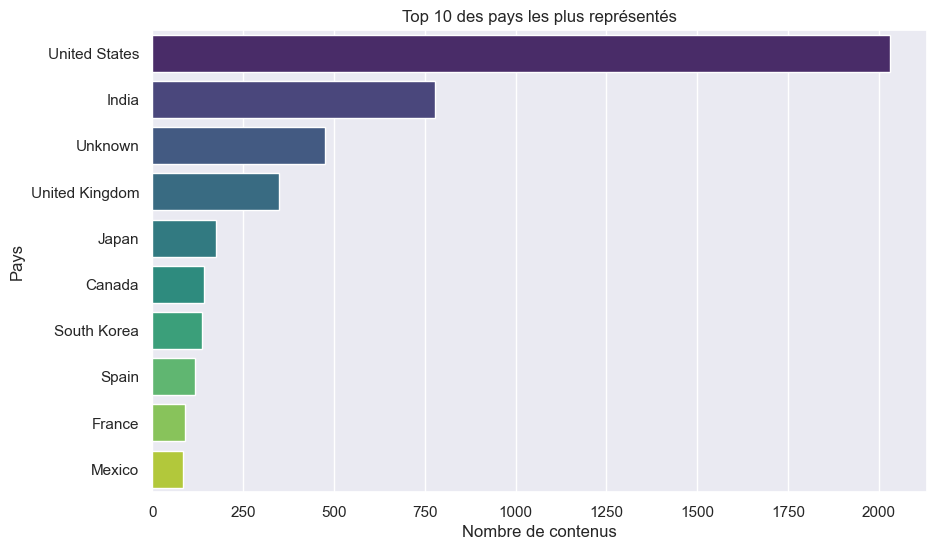

In [12]:
# Nettoyer la colonne 'country'
df['country'] = df['country'].fillna("Unknown")

# Compter les pays les plus présents
top_pays = df['country'].value_counts().head(10)

# Affichage graphique
sns.barplot(y=top_pays.index, x=top_pays.values, palette="viridis")
plt.title("Top 10 des pays les plus représentés")
plt.xlabel("Nombre de contenus")
plt.ylabel("Pays")
plt.show()

## Analyse des genres 
Netflix regroupe les genres dans une seule colonne **listed_in** (ex: "Dramas, International Movies").
On va voir quels sont les genres les plus courants.

C:\Users\jason_dalbergia\AppData\Local\Temp\ipykernel_7472\3779750136.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette="mako")


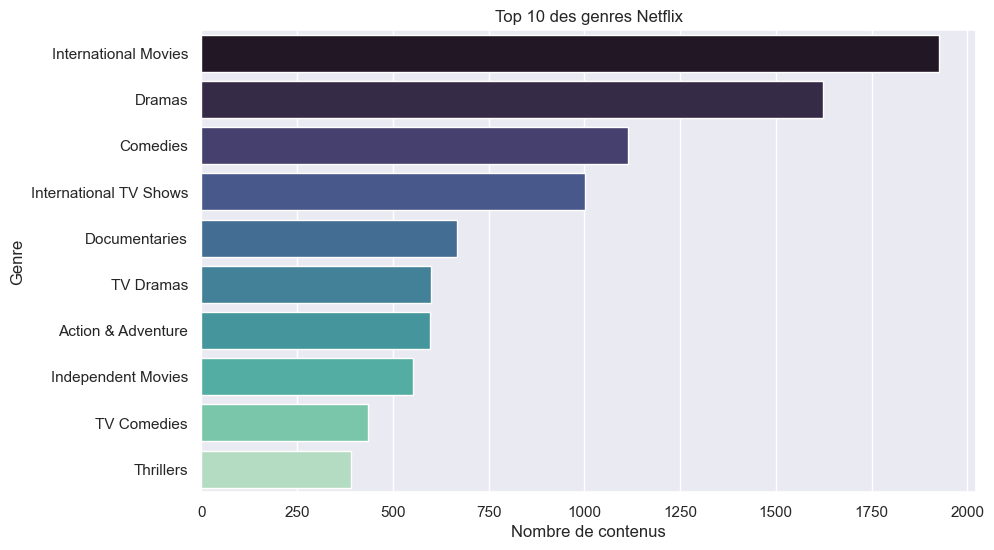

In [13]:
# On rassemble tous les genres dans une seule liste
all_genres = df['listed_in'].dropna().str.split(', ')
all_genres_flat = [genre for sublist in all_genres for genre in sublist]

# Compter la fréquence de chaque genre
from collections import Counter
genre_counts = Counter(all_genres_flat)

# Top 10 des genres
top_genres = genre_counts.most_common(10)

# Affichage
genres, counts = zip(*top_genres)
sns.barplot(x=list(counts), y=list(genres), palette="mako")
plt.title("Top 10 des genres Netflix")
plt.xlabel("Nombre de contenus")
plt.ylabel("Genre")
plt.show()

### Durée des films (colonne duration)

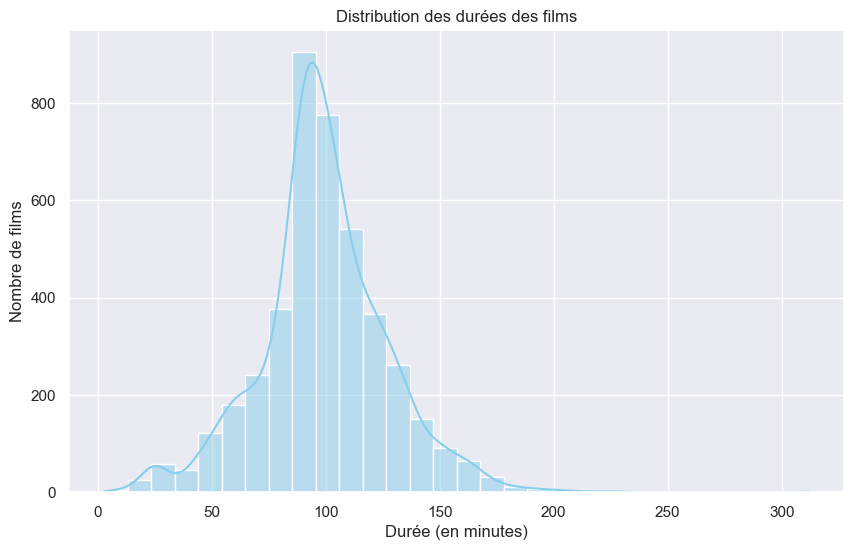

In [14]:
# Filtrer uniquement les films
films = df[df['type'] == 'Movie'].copy()

# Extraire la durée en minutes
films['duration'] = films['duration'].str.replace(' min', '').astype(float)

# Affichage de la distribution des durées
sns.histplot(films['duration'], bins=30, kde=True, color='skyblue')
plt.title("Distribution des durées des films")
plt.xlabel("Durée (en minutes)")
plt.ylabel("Nombre de films")
plt.show()

## ANALYSE AVANCÉE DES FILMS NETFLIX

### Réalisateurs les plus prolifiques

C:\Users\jason_dalbergia\AppData\Local\Temp\ipykernel_7472\3585624879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_directors.index, x=top_directors.values, palette='crest')


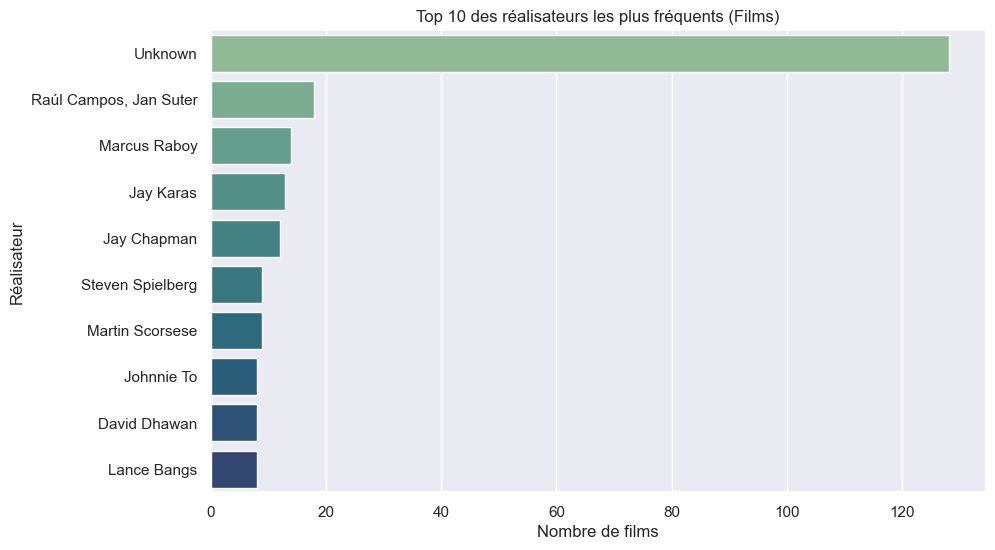

In [15]:
# Réalisateurs les plus présents
df['director'] = df['director'].fillna("Unknown")
top_directors = df[df['type'] == 'Movie']['director'].value_counts().head(10)

# Affichage
sns.barplot(y=top_directors.index, x=top_directors.values, palette='crest')
plt.title("Top 10 des réalisateurs les plus fréquents (Films)")
plt.xlabel("Nombre de films")
plt.ylabel("Réalisateur")
plt.show()

### Acteurs les plus récurrents

C:\Users\jason_dalbergia\AppData\Local\Temp\ipykernel_7472\168140475.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(actors), palette='flare')


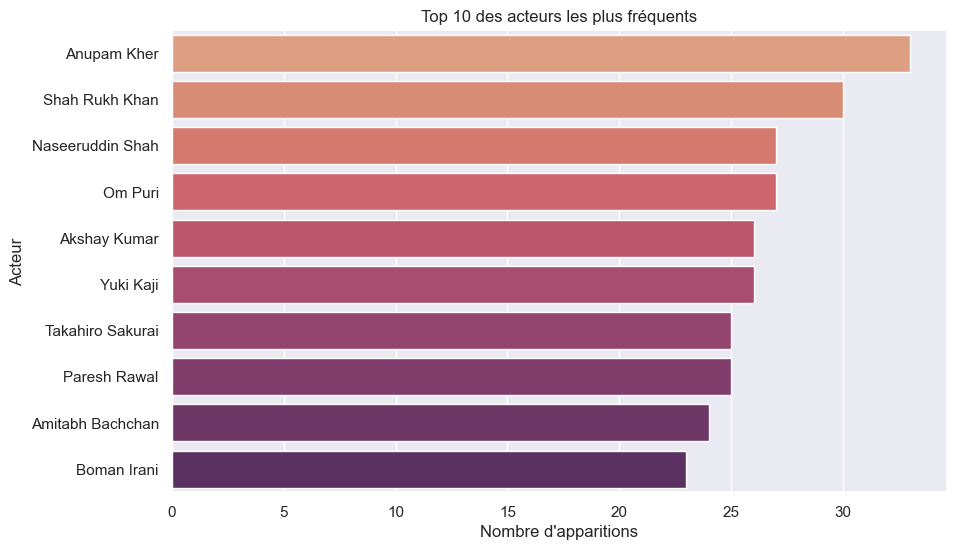

In [16]:
# Nettoyage
cast_series = df['cast'].dropna().str.split(', ')
all_cast = [actor.strip() for sublist in cast_series for actor in sublist]

# Compter les acteurs
from collections import Counter
cast_counter = Counter(all_cast)
top_actors = cast_counter.most_common(10)

# Affichage
actors, counts = zip(*top_actors)
sns.barplot(x=list(counts), y=list(actors), palette='flare')
plt.title("Top 10 des acteurs les plus fréquents")
plt.xlabel("Nombre d'apparitions")
plt.ylabel("Acteur")
plt.show()


### Analyse des mots-clés dans les titres

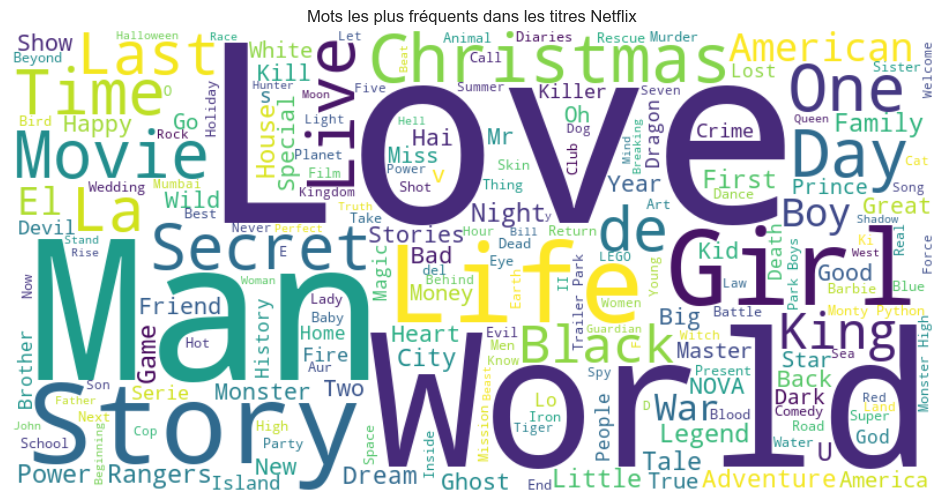

In [19]:
from wordcloud import WordCloud

# Joindre tous les titres
all_titles = ' '.join(df['title'].dropna())

# Nuage de mots
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_titles)

# Affichage
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Mots les plus fréquents dans les titres Netflix")
plt.show()

In [18]:
!pip install wordcloud